# Lab Segmentation 2

In [87]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
img_book = io.imread("book.png")
img_cameraman = io.imread("cameraman.png")
img_book1 = rgb2gray(io.imread("book1.png"))
img_cufe = rgb2gray(io.imread("cufe.png"))

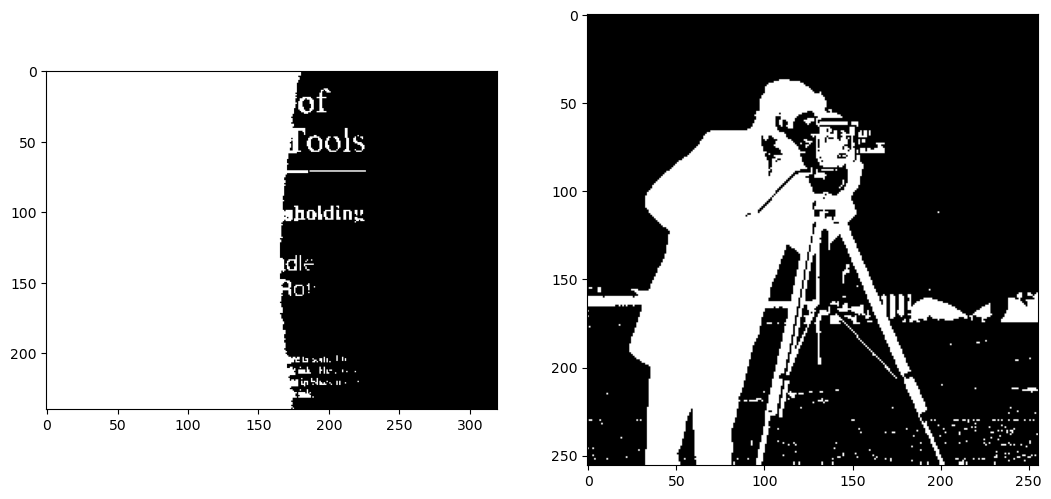

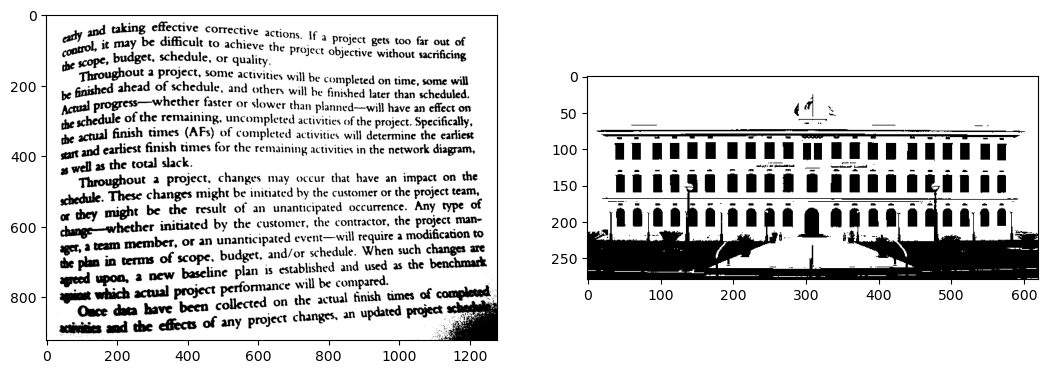

In [ ]:
def getThreshold(img):
    img = (img*255).astype('uint8')
    
    counts = np.zeros(256).astype('int')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            counts[img[i][j]] += 1

    cumsum = np.cumsum(counts)
    sum = 0
    for i in range(256):
        sum += i * counts[i]

    Tinit = round(sum / cumsum[255])
    # print(Tinit)

    Told = 0
    Tnew = Tinit

    while (Told != Tnew):
        Told = Tnew
        sum_lower = 0
        for i in range(Told):
            sum_lower += i * counts[i]
    
        lower_mean = round (sum_lower / cumsum[Told - 1])
    
        sum_higher = 0
        for i in range(Told, 256):
            sum_higher += i * counts[i]
    
        higher_mean = round(sum_higher / (cumsum[255] - cumsum[Told - 1]))
    
        Tnew = round((lower_mean + higher_mean) / 2)
        # print(Tnew)
    
    binarized_image = np.where(img < Tnew, 0, 255).astype(np.uint8)
    return binarized_image

show_images([getThreshold(img_book), getThreshold(img_cameraman)], ["", ""])
show_images([getThreshold(img_book1), getThreshold(img_cufe)], ["", ""])

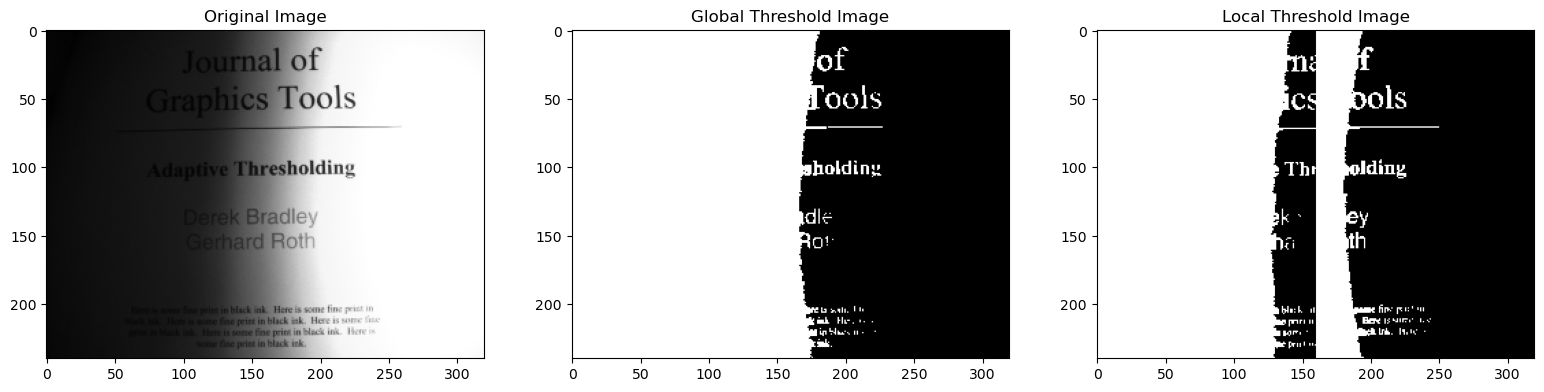

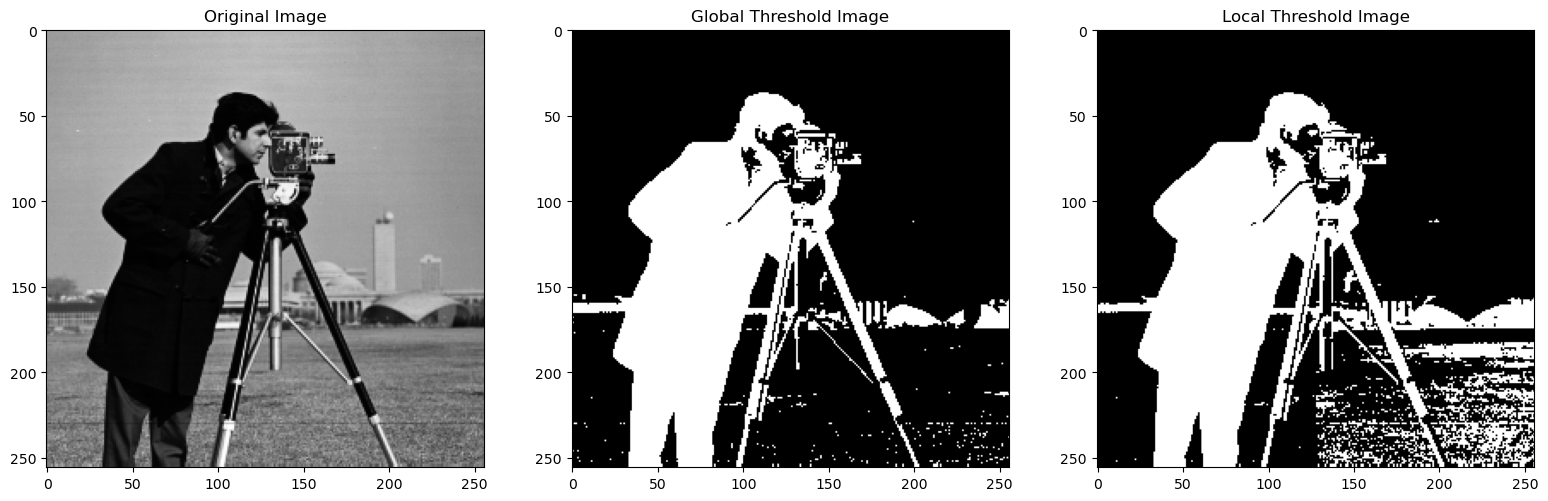

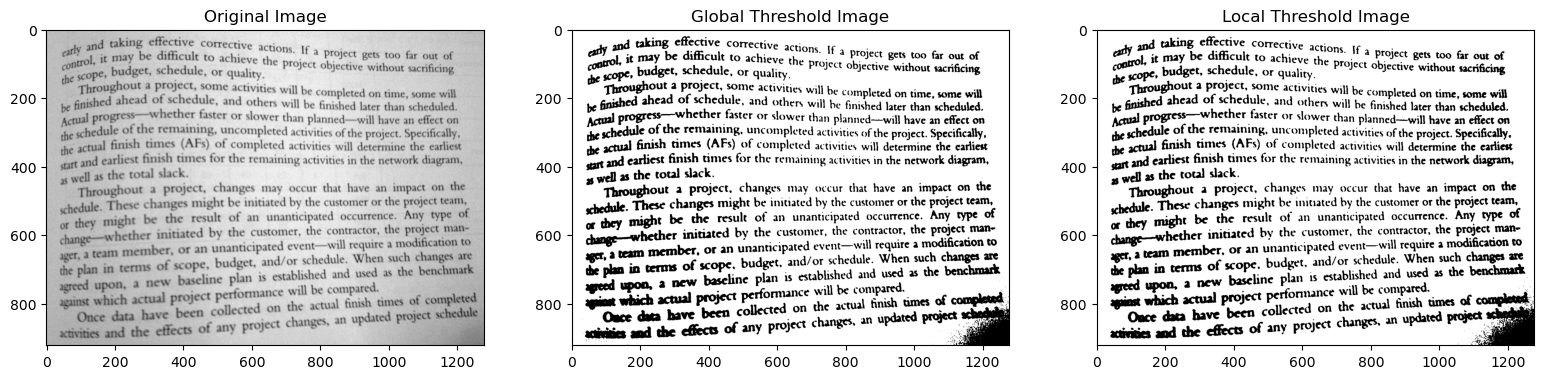

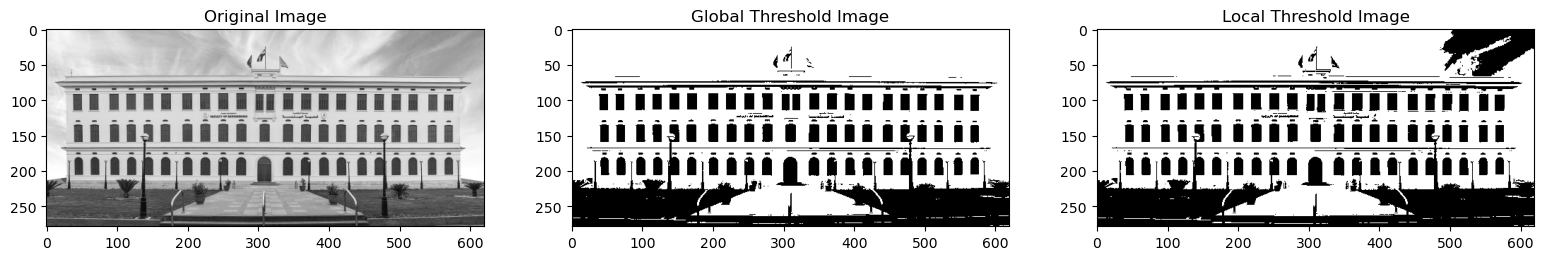

In [90]:
def getLocalThreshold(img):
    d1 = img.shape[0]
    d2 = img.shape[1]

    q1 = img[:d1//2, :d2//2]
    q2 = img[:d1//2, d2//2:]
    q3 = img[d1//2:, :d2//2]
    q4 = img[d1//2:, d2//2:]

    q1_T = getThreshold(q1)
    q2_T = getThreshold(q2)
    q3_T = getThreshold(q3)
    q4_T = getThreshold(q4)

    gathered_image = np.vstack((np.hstack((q1_T, q2_T)), np.hstack((q3_T, q4_T))))

    show_images([img, getThreshold(img), gathered_image], ["Original Image", "Global Threshold Image", "Local Threshold Image"])

getLocalThreshold(img_book)
getLocalThreshold(img_cameraman)
getLocalThreshold(img_book1)
getLocalThreshold(img_cufe)

